# No-show appointments 

## Table of Contents
<ul>
<li><a href = '#intro'>Introduction</a></li>
<li><a href = '#wrangling'>Data Wrangling </a></li>
<li><a href = '#eda'>Exploratory Data Analysis</a></li>
<li><a href = '#conclusions'>Conclusions</a></li>
</ul>

<a id = 'intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


In [42]:
# import panskages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_style('darkgrid')



<a id = 'wrangling'></a>
## Data Wrangling

> After importing the data and investing the data, there are 110527 rows and 14 columns and no missing value.<br>
Each row represents one appointment, therefore the appointmentID is set to the index. ScheduledDay and AppointmentDay is cast to data type of datetime. 

### General Properties
- PatientId
- Gender: Female/Male
- ScheduledDay: on what day the patient set up their appointment
- Appointment: on what day the appointment is going to be hold
- Age: the age of the patient
- Neighborhood: indicates the location of the hospital
- Scholarship:  indicates whether or not the patient is enrolled in Brasilian welfare program.
- Hypertension: indicated whether or not the patient has Hypertension
- Diabetes: indicated wheather or not the patient has Diabetes
- Handicap: indicated which level the patient has Handicap of
- SMS_received: indicated wheather the patient has received SMS
- Duration: how many days from the schedule date to the appointment data
- Dayofweek: in which day of the week on the appointment day.
- No_show: indicated wheather the patient has no show, it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.




In [43]:
# load data 

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', index_col = ['AppointmentID'])

In [44]:
print('shape of dataframe: ', df.shape)

shape of dataframe:  (110527, 13)


In [45]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [46]:
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.8+ MB


In [49]:
df.nunique()

PatientId          62299
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning
1. convert the data type
> After investing the data type for each columns, I convert the columns 'ScheduledDay' and 'AppointmentDay' to datatime data type.
2. assign new columns
> I assign a new column 'Duration', which represents the day difference between the appointment day and the day scheduled the appointment.<br>
It seems like there are some appointment that is scheduled at the same day, we can prevent that value by setting the same day scheduled to 0. <br>
And also assigning the column 'DayofWeek' to show which day of week for the appointment day.
3. rename the columns
> There are some column name in Spanish, convert them to English.
4. check erroneous data/ missing data
> Age: There is on missing values in the dataset. And one record has negative age. Therefore I drop the error record. And these are 7 patients are more than 100 years old, which considered as outliers. I drop these appointments as well. <br>
> For Handicap: in the data description, it is said that the handicap attribute should be boolean. However, the handicap assumnes values from 0 to 4. I map 0 to 0 and else to 1
5. Convert the dummy variable to numeric variable


In [50]:
# 1. convert to datetime 

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'].min(), df['ScheduledDay'].max()

(Timestamp('2015-11-10 07:13:56+0000', tz='UTC'),
 Timestamp('2016-06-08 20:07:23+0000', tz='UTC'))

In [51]:
# 2. assign new columns
df['Duration'] = (df['AppointmentDay'] - df['ScheduledDay']).astype('timedelta64[D]')
df['Duration'] = df['Duration'].apply(lambda x: 0 if x < 0 else x)
df['Dayofweek'] = df['AppointmentDay'].dt.weekday_name


In [52]:
# 3. rename columns, convert Spanish to English
df = df.rename(columns = {'Neighbourhood': 'Neighborhood',
                     'Hipertension': 'Hypertension', 
                     'Handcap': 'Handicap', 
                     'No-show': 'No_show'});

In [53]:
# 4. check for any erroneous data and missing data.
print('# of missing value: \n', df.isnull().sum())
# negative age of -1 and drop it
print('Age:', sorted(df.Age.unique()))
df = df[(df.Age > 0) & (df.Age < 100) ]
print('Gender:\n',df.Gender.value_counts())
print('Neighborhood: ', df.Neighborhood.unique())
print('Scholarship: \n',df.Scholarship.value_counts())
print('Hypertension: \n', df.Hypertension.value_counts())
print('Diabetes: \n', df.Diabetes.value_counts())
print('Alcoholism: \n', df.Alcoholism.value_counts())
print('Handicap: \n', df.Handicap.value_counts())
df['Handicap'] = np.where(df['Handicap'] > 0, 1, 0)
print('SMS_received: \n', df.SMS_received.value_counts())
print('No_show: \n', df.No_show.value_counts())

# of missing value: 
 PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
Duration          0
Dayofweek         0
dtype: int64
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender:
 F    70109
M    36867
Name: Gender, dtype: int64
Neighborhood:  ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 

In [54]:
# 5. convert the dummy variable to numberic variable
df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})
df['No_show'] = df['No_show'].replace({'No': 0, 'Yes': 1});

In [55]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Duration,Dayofweek
AppointmentID,,,,,,,,,,,,,,,
5642903,2.987250e+13,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.0,Friday
5642503,5.589978e+14,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.0,Friday
5642549,4.262962e+12,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.0,Friday
5642828,8.679512e+11,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0.0,Friday
5642494,8.841186e+12,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0.0,Friday


<a id = 'eda'></a>
## Exploratory Data Analysis

### Research Question: 
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

1. Overall, we could see that out of 106987 reservations around 21680 of them have turned no show and that's around 20%

2. Gender: 
   - Below we can see out of the 106987 appointments, there are 70118 female patients and 36869 male patients. 
   - The ratio of Females to Males that have turned up looks similar to those who have not come for the visit.
   - So gender may not play an important role in determining if a patient comes for a visit or not.
3. Age:
   - Age seems to influence negatively to no show rate at the age of 10 - 70 years. From age of 70 to age of 100, age shows positively influences to no show rate.
   - The age of 110-120 has highest no show rate, regrading the number of patients in this age range is small (7), it is reasonable to consider this age interval as outlier.
4. Condition: (Diabetes, Alcoholism, Handicap, Hypertension, Scholarship, SMS_received)
   - Having Diabetes, Handicap and Hypertension slightly decrease the no show rate.
   - Alcoholism has no influence to no show rate
   - Enrolling the scholarship increases the no show rate.
   - SMS_received: there are 72402 appiontments not received SMS and ouot of them around 16.7% are no show. Out of 34585 appointments which have received SMS around 27.66% of them did not show up. As we can see a clear distinction between people receiving SMS that was received and not receiving SMS, this feature will help us in determining of a patient will turn up for the visit after taking an appointment.
5. Duration: the numbers of days between the scheduling  date and appointment date
   - When the duration is longer than 100 days, the no show rate dramatically increases.
6. Neighborhood:
   - As most of neighborhoods have aroud 80% show rate. However, the neighborhood of ILHAS OCEÂNICAS DE TRINDADE has 100% no show rate, and the neighborhood of PARQUE INDUSTRIAL has 0% no show rate, and these two neighborhood carries the lowest number of appointment.
7. Day of week:
   - Friday and Saturday have the highest no show rate. 

   

In [56]:
# 1. overall no show rate 

print(df.No_show.mean())
print(df[df['Gender'] == 1].shape)

0.20263423571642236
(36867, 15)


In [57]:
#features = np.array(['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap'])


def plot_hist_dummy_or_cat(features):
    '''
    features: a array of feature's name 
    
    '''
    f, a = plt.subplots(4, 2, figsize = (15, 15))
    a = a.ravel()
    for idx, ax in enumerate(a):
        ax.hist(df[features[idx]])
        ax.set_title('Number of {}'.format(features[idx]))
        ax.set_xlabel(features[idx])
        ax.set_ylabel('number')
        ax.xaxis.set_ticks(sorted(df[features[idx]].unique()))
    plt.tight_layout()
    


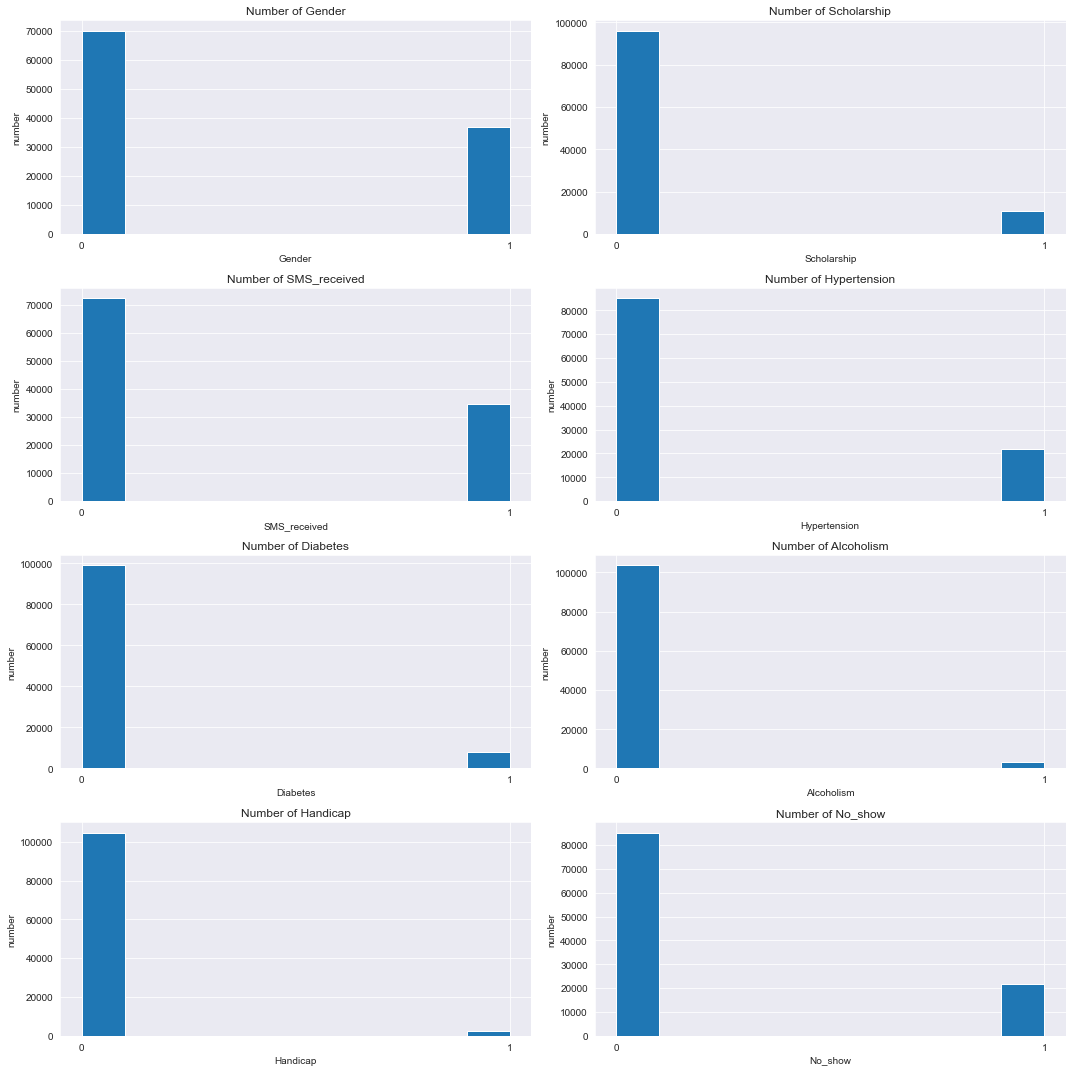

In [58]:
features = np.array(['Gender', 'Scholarship', 'SMS_received' , 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'No_show'])

plot_hist_dummy_or_cat(features);
# plt.savefig('pic/q1.png')

From the histograms above, we could tell the amount of female patients is almost twice larger then the male patients. And for Scholarship, SMS_received, Hypertension, Diabetes, Alcoholism, Handicap, the amount of patients not having these conditions are larger than the amount of patients having these conditions. As as well as the no show number, the no show is around 20% out of the whole dataset. This is an example of the class imbalance problem where the number of data points belonging to the minority class (in our case, no show) is far smaller than the number of the data points belonging to the majority class (show up). 

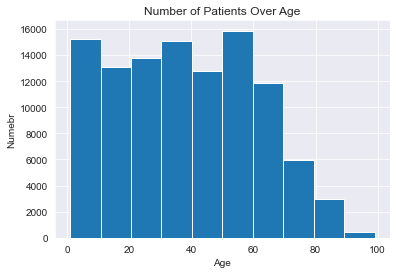

In [59]:
df.Age.hist()
plt.title('Number of Patients Over Age')
plt.xlabel('Age')
plt.ylabel('Numebr');
#plt.savefig('pic/q2.png')

From the histogram of Age, generally from age of 0 to 60, the amount of appointments are all above 12000. After age of 60, the amount of patient dropes rapidally. Between age of 90 and age of 100, there are fewer than 300.

In [60]:
# No show rate by age
df['Age_group'] = pd.cut(df['Age'],20)
no_show_by_age = df.groupby('Age_group').No_show.mean().fillna(0)


In [61]:
def plot_rate_by_feature(feature):
    feature_df = df.groupby(feature).No_show.mean().fillna(0)
    if df[feature].dtype == float:
        xlabel = feature_df.index
    else:
        xlabel = feature_df.index.astype(str)
    plt.figure(figsize = (16,10))
    plt.xticks(rotation = 90)
    ax = sns.barplot(x = xlabel, y = feature_df.values)
    ax.set_xlabel(feature)
    ax.set_ylabel('no show rate')
    plt.title('no show rate by {}'.format(feature))

70109
36867


Gender
0    0.203569
1    0.200857
Name: No_show, dtype: float64

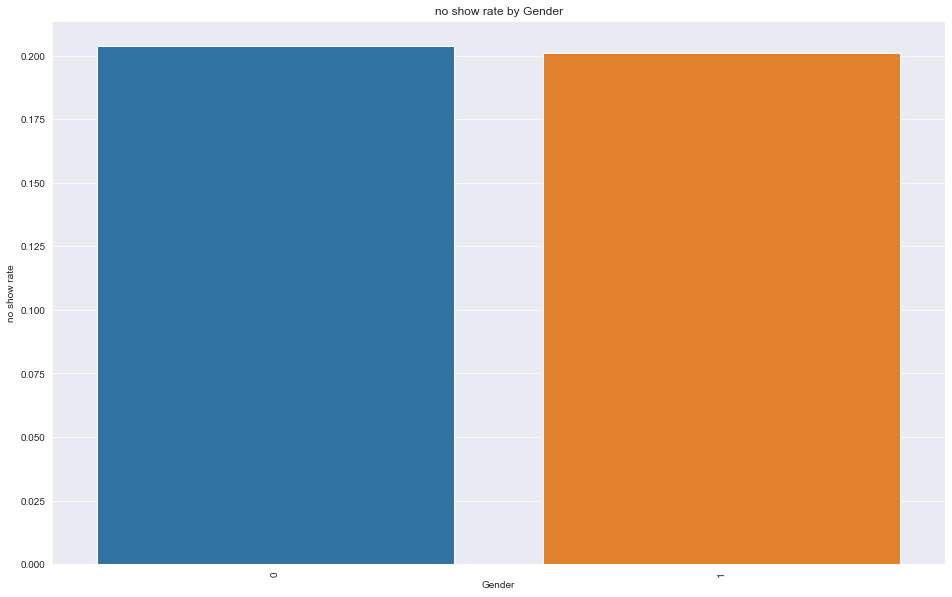

In [62]:
# 2. Gender
plot_rate_by_feature('Gender')
print(len(df[df.Gender == 0]))
print(len(df[df.Gender == 1]))

df.groupby('Gender').No_show.mean()

#plt.savefig('pic/q3.png')

Out of 70109 appointment having female patients, there are 20.3569% no show rate. And out of 36867 appointments having male patients, there are 20.0857% no show rate, which shows no much difference.

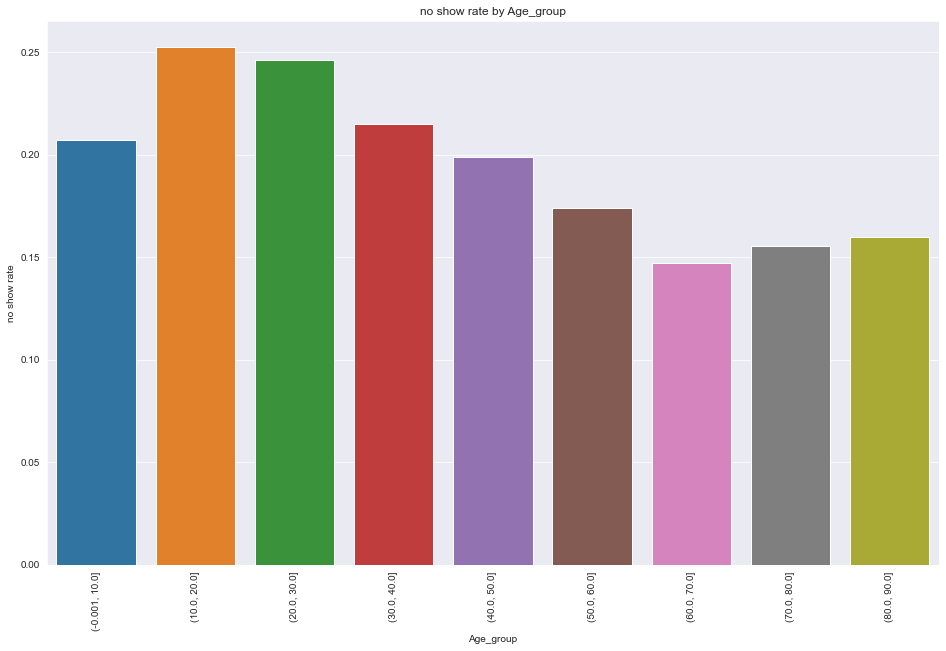

In [63]:
# 3. Age
# No show rate by age
df['Age_group'] = pd.cut(df['Age'],np.arange(0, 100, 10), include_lowest = True)

plot_rate_by_feature('Age_group')

# plt.savefig('pic/q4.png')

From Age of 10 to Age of 70, the age makes negatively impact to the mno show rate, which means having age between 10 to 20 years old has the highest no show rate above 25%, and having age of 60 to 70 years old has the lowest no show rate below 15%.

In [64]:
# 4. Condition: Diabetes, Alcoholism, Handicap, Hypertension
def no_show_rate_by_conditions(conditions):
    rows = []
    for i in conditions:
        for level in df[i].unique():
            row = {'Condition': i}
            total = len(df[df[i]==level])
            n = len(df[(df[i]==level) & (df['No_show']==1)])
            prob = round(n/total, 2)
            row.update({'level':level, 'probability': prob})
            rows.append(row)
    return pd.DataFrame(rows)
            
        
def plot_no_show_rate_by_conditions(sub_df):
    plt.figure(figsize = (10, 8))
    ax = sns.barplot(data = sub_df, 
                x='Condition', 
                y='probability',
                hue = 'level')
    ax.set_xlabel('Condition')
    ax.set_ylabel('Probability')
    ax.set_title('No show rate by conditions')
    plt.show()

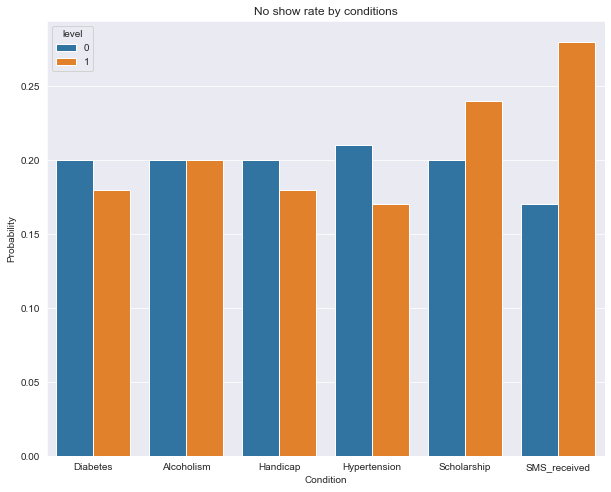

In [65]:
plot_no_show_rate_by_conditions(no_show_rate_by_conditions(['Diabetes', 'Alcoholism', 'Handicap', 'Hypertension', 'Scholarship', 'SMS_received']))



- Having Diabetes, Handicap and Hypertension slightly decrease the no show rate.
- Alcoholism has no influence to no show rate
- Enrolling the scholarship increases the no show rate.
- SMS_received: there are 72402 appiontments not received SMS and ouot of them around 16.7% are no show. Out of 34585 appointments which have received SMS around 27.66% of them did not show up. As we can see a clear distinction between people receiving SMS that was received and not receiving SMS, this feature will help us in determining of a patient will turn up for the visit after taking an appointment.

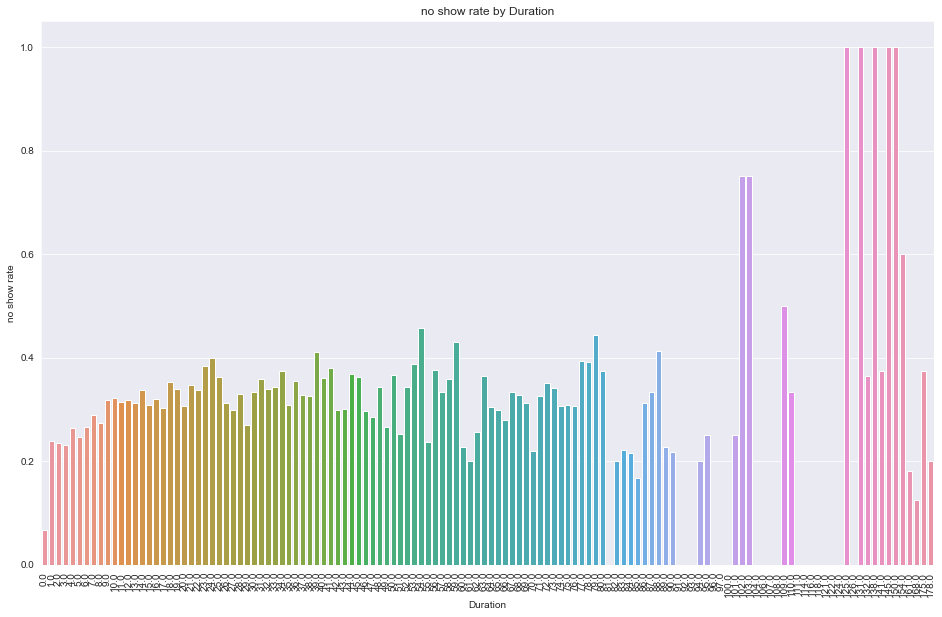

In [66]:
# 5. Duration, waiting day
plot_rate_by_feature('Duration')
# plt.savefig('pic/q6.png')

Then, the days between the call of the appointment and the actual appointment were calculated. As seen in the graph, if the appointment is scheduled within 14 days of the call, the no-show rate is generally lower compared to the average. From 14 days to 60 days, the rate stays steady around 35%, and the range starts to vary quite large after that, possibly also due to a smaller sample size.

In [67]:
# 6. Neighborhood:
neighborhood_count = df.groupby(['Neighborhood'])['No_show'].count()
neighborhood_noshow = df.groupby(['Neighborhood'])['No_show'].sum()

neighborhood = pd.concat([neighborhood_count, neighborhood_noshow], axis = 1)
neighborhood.columns = ['total', 'noshow_count']
neighborhood['prec'] = round(neighborhood['noshow_count']/neighborhood['total'], 2)
neighborhood['total_prec'] = 1
neighborhood = neighborhood.reset_index()

neighborhood.head()

#neighborhood.total.max()


,Neighborhood,total,noshow_count,prec,total_prec
0,AEROPORTO,8,1,0.12,1
1,ANDORINHAS,2191,506,0.23,1
2,ANTÔNIO HONÓRIO,256,45,0.18,1
3,ARIOVALDO FAVALESSA,268,61,0.23,1
4,BARRO VERMELHO,418,91,0.22,1


Text(0.5, 0.98, 'Absent appointments by neighborhood')

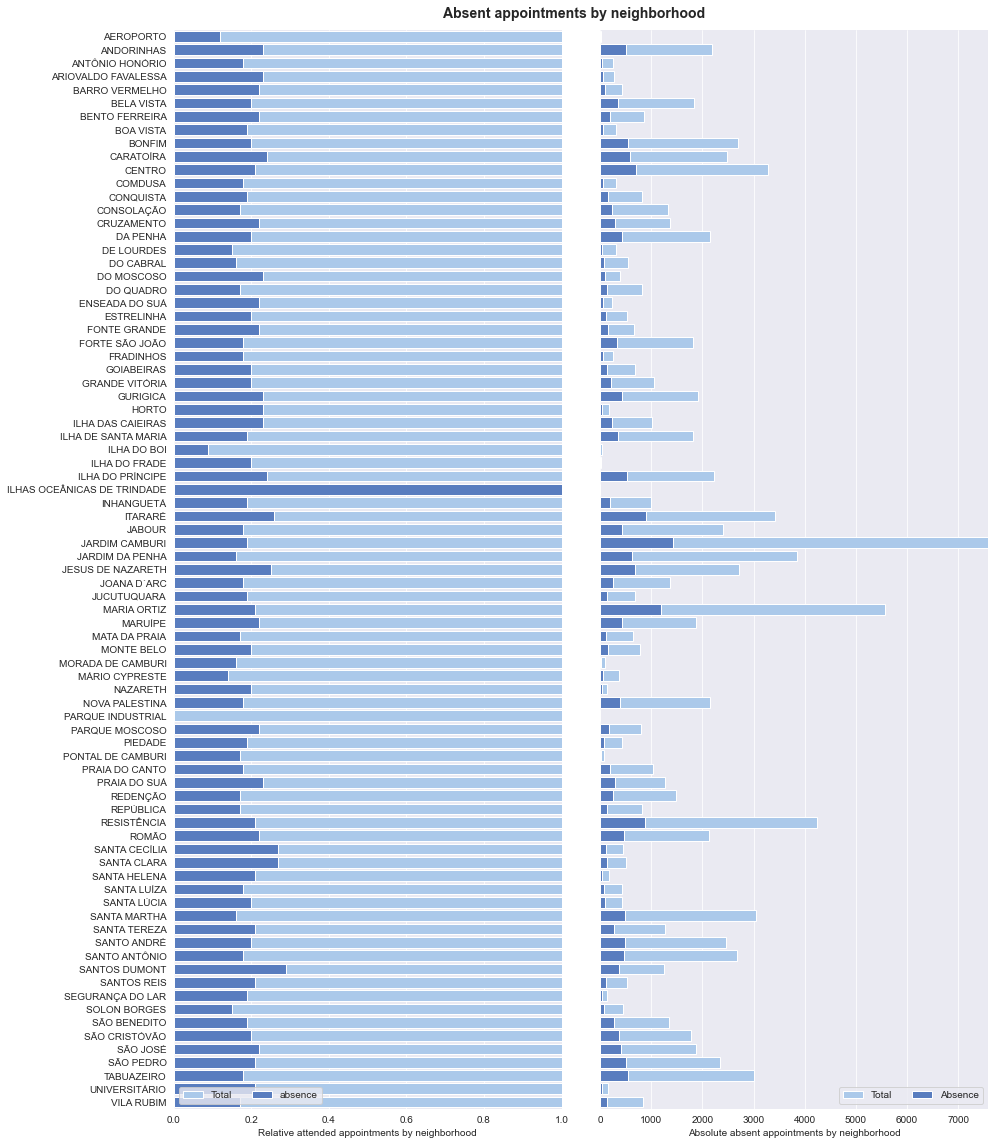

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 16), sharey = False)
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
# Plot the relative absence  by neighborhood
# total appointments
sns.set_color_codes('pastel')
sns.barplot(x = 'total_prec', y='Neighborhood',
            data = neighborhood, label = 'Total', 
           color = 'b', ax=ax1)
# attended no show
sns.set_color_codes('muted')
sns.barplot(x = 'prec', y='Neighborhood', 
            data = neighborhood, label='absence',
           color = 'b', ax = ax1)
# add legned and label
ax1.legend(ncol = 2, loc='lower left', frameon = True)
ax1.set(xlim = (0, 1), ylabel = '', xlabel = 'Relative attended appointments by neighborhood')
sns.despine(left = True, bottom = True, ax = ax1)

# Plot the absi=olute absence by neighborhood
# total appointments
sns.set_color_codes('pastel')
sns.barplot(x = 'total', y = 'Neighborhood', 
            data = neighborhood, label = 'Total',
           color = 'b', ax = ax2)
# attended no show
sns.set_color_codes('muted')
sns.barplot(x = 'noshow_count', y = 'Neighborhood', 
            data = neighborhood, label = 'Absence',
           color = 'b', ax = ax2)
# add legend and label
ax2.legend(ncol = 2, loc = 'lower right', frameon = True )
ax2.set(xlim = (0, 7586), ylabel = '', xlabel = 'Absolute absent appointments by neighborhood')
ax2.set_yticklabels([''])
sns.despine(left = True, bottom = True, ax = ax2)

plt.suptitle('Absent appointments by neighborhood', fontsize = 14, fontweight = 'bold')


#plt.savefig('pic/q7.png')

As most of neighborhoods have aroud 80% show rate. However, the neighborhood of ILHAS OCEÂNICAS DE TRINDADE has 100% no show rate, and the neighborhood of PARQUE INDUSTRIAL has 0% no show rate, and these two neighborhood carries the lowest number of appointment.

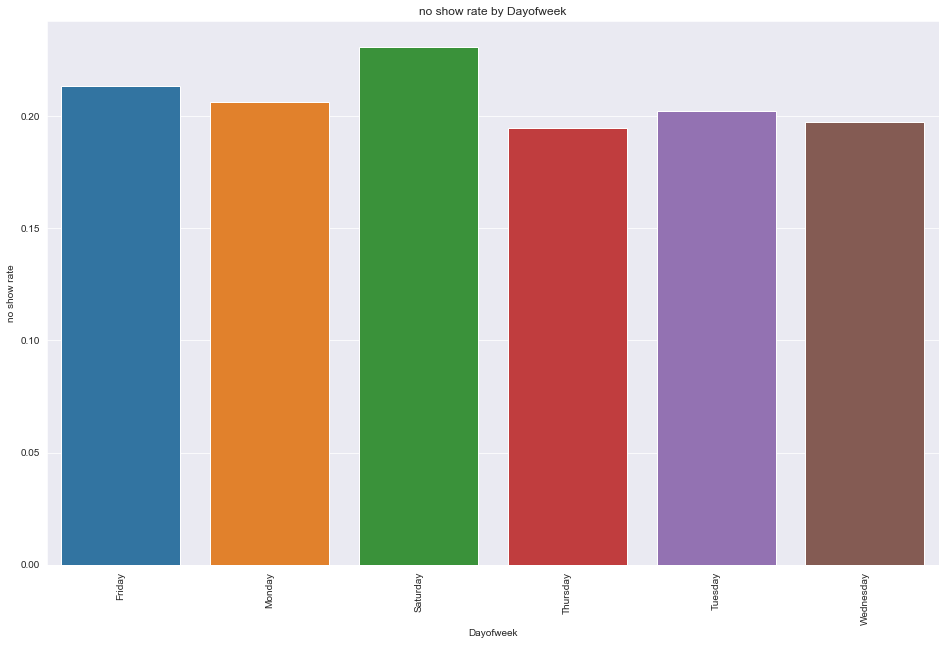

In [64]:
# 7. dayofweek
plot_rate_by_feature('Dayofweek')![]

Similar analysis were done in regards of the day of the week. Overall, the no-show rate stays quite similar (~20%) across weekdays. Saturday’s no-show rates are higher, however the number of appointments scheduled on Saturdays are also smaller (around 1400 total, compared to 10k+ for all other days), and there are no Sunday appointment.

<a id = 'conclusions'></a>
## Conclusion

This analysis sought to explore the medical appointment no-shows dataset, containing more than 100.000 appointments and of which approximately 20% of the patients have not attended. In this way, the data exploration presented in this notebook had the purpose to show up some insights on the possible causes of this appointment missing. It is important to notice, though, that with the provided data and the applied methods it is not possible to affirm any statement with statistical validity nor causal relations. On the other hand, the insights obtained through this analysis can, instead, inform and direct in-depth research on the subject, in order to validate the causes of the appointment missing and find ways to eradicate them.

**Limitation**

the present analysis was limited to categorizing the patient waiting time and exploring the associations of these categories with other attributes. Nevertheless, it was possible to provide relevant insights that could lead to a controlled data acquisition for future researches on this topic.

In [79]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'no_show_analysis.ipynb'])

0